In [1]:
import pandas as pd

# 한글 폰트 깨짐 방지
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

#에러 무시
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import scale, minmax_scale, robust_scale

import xgboost

import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'


In [2]:
hts = pd.read_csv('hts.csv')
hitter = pd.read_csv('hitter.csv')
player = pd.read_csv('player.csv')

In [3]:
hts.head()

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM
0,2018,20180324HHWO0,180324_140436,62797,HH,1,131.50,42.7,플라이,149.59,고척
1,2018,20180324HHWO0,180324_140514,76753,HH,1,135.18,9.9,1루타,148.78,고척
2,2018,20180324HHWO0,180324_140647,71752,HH,1,152.41,2.1,1루타,148.59,고척
3,2018,20180324HHWO0,180324_140911,62700,HH,1,113.72,13.5,1루타,139.13,고척
4,2018,20180324HHWO0,180324_142050,68730,HH,2,54.11,16.4,번트안타,134.07,고척


In [4]:
hitter.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,...,TOTB,SLG,SF,BB,KK,IB,HP,GD,출루율,OPS
0,0,0,0,2018,60100,70,169,152,0.243,37,...,63,0.414,1,12,36,0,4,5,0.314,0.728
1,1,1,1,2018,60184,6,10,10,0.200,2,...,3,0.300,0,0,3,0,0,0,0.200,0.500
2,2,2,2,2018,60288,1,1,1,0.000,0,...,0,0.000,0,0,0,0,0,0,0.000,0.000
3,3,3,3,2018,60343,83,174,162,0.216,35,...,63,0.389,0,8,49,0,3,3,0.266,0.655
4,4,4,4,2018,60456,4,8,6,0.500,3,...,3,0.500,0,2,0,0,0,0,0.625,1.125


In [5]:
player.head()

,GYEAR,PCODE,NAME,T_ID,POSITION,AGE_VA,MONEY
0,2018,60100,백창수,HH,외,30,5000만원
1,2018,60105,배민관,LG,투,26,3200만원
2,2018,60140,신정락,LG,투,31,10500만원
3,2018,60146,이승현,SS,투,26,7000만원
4,2018,60181,김지용,LG,투,30,9000만원


In [6]:
# 출루율 계산
hitter['출루율'] = ((hitter['HIT']+hitter['BB']+hitter['HP'])/(hitter['AB']+hitter['BB']+hitter['HP']+hitter['SF'])).round(3)

In [7]:
# OPS 계산
hitter['OPS'] = hitter['SLG'] + hitter['출루율']

In [8]:
# csv파일 생성
hitter.to_csv('hitter.csv')

In [9]:
hts

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM
0,2018,20180324HHWO0,180324_140436,62797,HH,1,131.50,42.7,플라이,149.59,고척
1,2018,20180324HHWO0,180324_140514,76753,HH,1,135.18,9.9,1루타,148.78,고척
2,2018,20180324HHWO0,180324_140647,71752,HH,1,152.41,2.1,1루타,148.59,고척
3,2018,20180324HHWO0,180324_140911,62700,HH,1,113.72,13.5,1루타,139.13,고척
4,2018,20180324HHWO0,180324_142050,68730,HH,2,54.11,16.4,번트안타,134.07,고척
...,...,...,...,...,...,...,...,...,...,...,...
120740,2021,20210711LTSS0,210711_195321,50458,SS,8,141.23,-4.9,땅볼아웃,137.76,대구
120741,2021,20210711LTSS0,210711_195424,62415,SS,8,101.09,31.8,1루타,138.51,대구
120742,2021,20210711LTSS0,210711_195627,75566,SS,8,146.84,33.4,홈런,134.10,대구
120743,2021,20210711LTSS0,210711_200047,69418,SS,8,146.12,23.9,홈런,139.96,대구


In [10]:
# # # PCODE 인덱스로 선수명 넣기
# hts.set_index('PCODE', inplace=True)

In [11]:
# df_merge = pd.merge(df, corona_1dd, left_index = True, right_index = True)

In [12]:
# df_merge = df_merge.reset_index(drop = True)

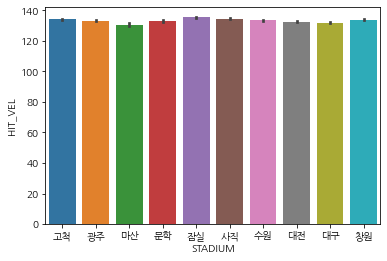

In [13]:
sns.barplot(x = 'STADIUM', y = 'HIT_VEL', data = hts)

plt.show()

<AxesSubplot:xlabel='STADIUM', ylabel='HIT_VEL'>

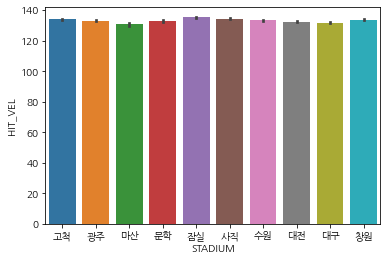

In [14]:
sns.barplot(x = 'STADIUM', y = 'HIT_VEL', data = hts)

<AxesSubplot:xlabel='HIT_RESULT', ylabel='HIT_VEL'>

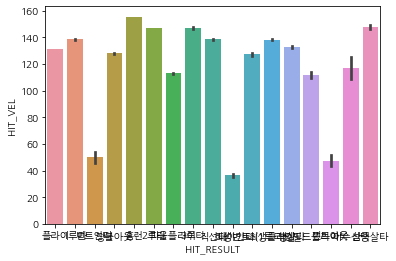

In [15]:
hts.groupby(['HIT_RESULT'])['HIT_VEL'].agg(['mean'])
sns.barplot(x = 'HIT_RESULT', y = 'HIT_VEL', data = hts)

In [16]:
hts.groupby(['HIT_RESULT'])['HIT_ANG_VER'].agg(['mean'])

,mean
HIT_RESULT,
1루타,8.119682
2루타,16.655180
3루타,19.226339
내야안타(1루타),-4.039613
땅볼아웃,-7.601705
번트아웃,-7.763636
번트안타,-9.900000
병살타,-7.090470
삼중살타,-13.650000


In [17]:
hts

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM
0,2018,20180324HHWO0,180324_140436,62797,HH,1,131.50,42.7,플라이,149.59,고척
1,2018,20180324HHWO0,180324_140514,76753,HH,1,135.18,9.9,1루타,148.78,고척
2,2018,20180324HHWO0,180324_140647,71752,HH,1,152.41,2.1,1루타,148.59,고척
3,2018,20180324HHWO0,180324_140911,62700,HH,1,113.72,13.5,1루타,139.13,고척
4,2018,20180324HHWO0,180324_142050,68730,HH,2,54.11,16.4,번트안타,134.07,고척
...,...,...,...,...,...,...,...,...,...,...,...
120740,2021,20210711LTSS0,210711_195321,50458,SS,8,141.23,-4.9,땅볼아웃,137.76,대구
120741,2021,20210711LTSS0,210711_195424,62415,SS,8,101.09,31.8,1루타,138.51,대구
120742,2021,20210711LTSS0,210711_195627,75566,SS,8,146.84,33.4,홈런,134.10,대구
120743,2021,20210711LTSS0,210711_200047,69418,SS,8,146.12,23.9,홈런,139.96,대구


#### 하드-힛 타구 : 95마일(153km)이상 타구
 - 날씨나 상대 투수 성향 등 저번에 조사했던건 OPS예측에 활용되겠지만,
 - 배럴 타구 생산에는 필요 없을듯
  - 배럴 타구는 타구 그 자체를 봐야하지만 날씨나 기타 요소들은 배럴타구가 나올 수 있는 조건?이니까 상관 없을듯
  
   - 그러면 배럴타구를 나누는 기준?
    - 1루타 : 1
    - 2루타 : 2
    - 3루타 : 3
    - 홈런 : 4
    - 라인드라이브 : 1.5

In [18]:
barrel = hts.groupby(['HIT_RESULT'])['HIT_ANG_VER', 'HIT_VEL'].agg(['mean', 'median'])

In [19]:
# barrel = barrel.reset_index()
# df_merge = df_merge.reset_index(drop = True)

In [20]:
barrel

HIT_ANG_VER            HIT_VEL         
                  mean median        mean   median
HIT_RESULT                                        
1루타           8.119682   8.50  138.463661  142.390
2루타          16.655180  17.10  146.996789  149.740
3루타          19.226339  19.50  146.953244  148.140
내야안타(1루타)    -4.039613  -4.00  127.464066  132.545
땅볼아웃         -7.601705  -6.90  128.049032  132.540
번트아웃         -7.763636 -13.05   47.452500   43.840
번트안타         -9.900000 -11.25   49.841667   49.550
병살타          -7.090470  -6.40  132.850467  137.300
삼중살타        -13.650000 -13.65  147.740000  147.740
야수선택         -8.244231  -8.25  117.096923  114.525
인필드플라이       63.776435  64.40  111.592598  114.400
직선타           9.322238   8.35  138.483418  142.405
파울플라이        68.867220  71.60  113.005253  115.660
플라이          39.004042  36.80  131.195242  133.920
홈런           28.781255  28.20  155.275731  155.430
희생번트        -13.031381 -16.80   36.291004   35.520
희생플라이        31.907923  31.00  138.274735  138.610

In [21]:
barrel = barrel.loc[['1루타', '2루타', '3루타', '홈런', '직선타', '플라이', '희생플라이']]

In [22]:
barrel

HIT_ANG_VER            HIT_VEL         
                  mean median        mean   median
HIT_RESULT                                        
1루타           8.119682   8.50  138.463661  142.390
2루타          16.655180  17.10  146.996789  149.740
3루타          19.226339  19.50  146.953244  148.140
홈런           28.781255  28.20  155.275731  155.430
직선타           9.322238   8.35  138.483418  142.405
플라이          39.004042  36.80  131.195242  133.920
희생플라이        31.907923  31.00  138.274735  138.610

In [23]:
hts_filter = hts.loc[(hts['HIT_RESULT'] == '1루타') |
       (hts['HIT_RESULT'] == '2루타') |
       (hts['HIT_RESULT'] == '3루타') |
       (hts['HIT_RESULT'] == '홈런') |
       (hts['HIT_RESULT'] == '직선타') |
       (hts['HIT_RESULT'] == '플라이') |
       (hts['HIT_RESULT'] == '희생플라이')]
#         '3루타', '홈런', '직선타', '플라이', '희생플라이']

In [24]:
drops = ['GYEAR', 'G_ID','PIT_ID', 'PCODE', 'T_ID', 'INN', 'STADIUM']
hts_filter.drop(drops, axis = 1, inplace = True)

In [25]:
hts_filter

,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL
0,131.50,42.7,플라이,149.59
1,135.18,9.9,1루타,148.78
2,152.41,2.1,1루타,148.59
3,113.72,13.5,1루타,139.13
5,161.90,3.5,1루타,145.75
...,...,...,...,...
120739,96.34,69.4,플라이,141.47
120741,101.09,31.8,1루타,138.51
120742,146.84,33.4,홈런,134.10
120743,146.12,23.9,홈런,139.96


- 배럴타구 정의는 담백하게? : KBO 실정에 맞는
 - KBO 실정에 맞는 기준? 거시적으로 보기
  - MLB가 왜 타율 .5에 장타율 1.5로 기준을 잡았는지?
  
- 속도, 각도 외 1개 요소 + 타율 .x, 장타율 x.x 기준 잡기
- 타구 좌우 각도나 비거리 데이터 있으면 좋을듯 : 샘플로 찾고 모델링으로 넣기?

In [26]:
hts

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM
0,2018,20180324HHWO0,180324_140436,62797,HH,1,131.50,42.7,플라이,149.59,고척
1,2018,20180324HHWO0,180324_140514,76753,HH,1,135.18,9.9,1루타,148.78,고척
2,2018,20180324HHWO0,180324_140647,71752,HH,1,152.41,2.1,1루타,148.59,고척
3,2018,20180324HHWO0,180324_140911,62700,HH,1,113.72,13.5,1루타,139.13,고척
4,2018,20180324HHWO0,180324_142050,68730,HH,2,54.11,16.4,번트안타,134.07,고척
...,...,...,...,...,...,...,...,...,...,...,...
120740,2021,20210711LTSS0,210711_195321,50458,SS,8,141.23,-4.9,땅볼아웃,137.76,대구
120741,2021,20210711LTSS0,210711_195424,62415,SS,8,101.09,31.8,1루타,138.51,대구
120742,2021,20210711LTSS0,210711_195627,75566,SS,8,146.84,33.4,홈런,134.10,대구
120743,2021,20210711LTSS0,210711_200047,69418,SS,8,146.12,23.9,홈런,139.96,대구


In [27]:
player

,GYEAR,PCODE,NAME,T_ID,POSITION,AGE_VA,MONEY
0,2018,60100,백창수,HH,외,30,5000만원
1,2018,60105,배민관,LG,투,26,3200만원
2,2018,60140,신정락,LG,투,31,10500만원
3,2018,60146,이승현,SS,투,26,7000만원
4,2018,60181,김지용,LG,투,30,9000만원
...,...,...,...,...,...,...,...
2634,2021,79456,이지영,WO,포,35,30000만원
2635,2021,79545,진명호,LT,투,32,7500만원
2636,2021,79608,안치홍,LT,내,31,29000만원
2637,2021,79764,장민재,HH,투,31,10000만원


In [47]:
# hts_pcode = hts
# player_pcode = player

In [28]:
# # PCODE 인덱스로 선수명 넣기
# hts_pcode.set_index('PCODE', inplace=True)

In [29]:
# player_pcode.set_index('PCODE', inplace=True)

In [30]:
# hts_player_check = pd.merge(hts_pcode, player_pcode, left_index = True, right_index = True)

In [36]:
# # drops = ['G_ID','PIT_ID', 'INN', 'STADIUM']
# hts_player_check.drop(drops, axis = 1, inplace = True)

In [56]:
hts['PCODE'].value_counts()

67341    1514
78513    1419
79240    1392
76290    1368
71564    1355
         ... 
62668       1
50819       1
67610       1
67123       1
65096       1
Name: PCODE, Length: 437, dtype: int64

In [58]:
player.loc[(player['POSITION'] == '내') |
          (player['POSITION'] == '외') |
          (player['POSITION'] == '포')]

,GYEAR,PCODE,NAME,T_ID,POSITION,AGE_VA,MONEY
0,2018,60100,백창수,HH,외,30,5000만원
5,2018,60184,김창혁,HH,포,27,2700만원
8,2018,60288,김응민,SS,포,26,3000만원
12,2018,60343,이해창,KT,포,31,7100만원
14,2018,60456,백상원,SS,내,30,6000만원
...,...,...,...,...,...,...,...
2629,2021,79334,장영석,HT,내,31,6000만원
2631,2021,79365,박동원,WO,포,31,23000만원
2632,2021,79402,김상수,SS,내,31,25000만원
2634,2021,79456,이지영,WO,포,35,30000만원


In [15]:
player.loc[(player['PCODE'] == 67005)]

,GYEAR,PCODE,NAME,T_ID,POSITION,AGE_VA,MONEY
320,2018,67005,홍현빈,KT,외,20,2900만원
1696,2020,67005,홍현빈,KT,외,22,2900만원
2402,2021,67005,홍현빈,KT,외,23,3400만원
